In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


os.chdir('C:\\Users\\Aditya\\Desktop\\Top Mentor\\Capstone Project\\Udemy Credit Risk Modelling Project\\')

In [3]:


data = pd.read_csv('credit_risk_dataset.csv')

In [4]:
display(data.head())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
display(data.tail())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
data.shape

(32581, 12)

In [8]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [9]:
data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [10]:
# Checking the null values

data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
# Since we have lots of data so instead of filling missing values we can remove them

data.dropna(axis=0,inplace=True)

In [12]:
# Checking if missing values dropped

data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
# checking the counts of duplicates

data.duplicated().sum()

137

In [14]:
# removing duplicate values 

data.drop_duplicates(inplace=True)

In [15]:
# Checking if duplicates values removed

data.duplicated().sum()

0

         Loan Intent  Default Count  Average Loan Amount
3            MEDICAL           1418         11373.748237
0  DEBTCONSOLIDATION           1294         11316.750386
1          EDUCATION            967         11160.082730
4           PERSONAL            961         10708.896982
2    HOMEIMPROVEMENT            820          9966.067073
5            VENTURE            728         11304.910714
         Loan Intent  Default Count  Average Loan Amount
3            MEDICAL           1418         11373.748237
0  DEBTCONSOLIDATION           1294         11316.750386
5            VENTURE            728         11304.910714
1          EDUCATION            967         11160.082730
4           PERSONAL            961         10708.896982
2    HOMEIMPROVEMENT            820          9966.067073


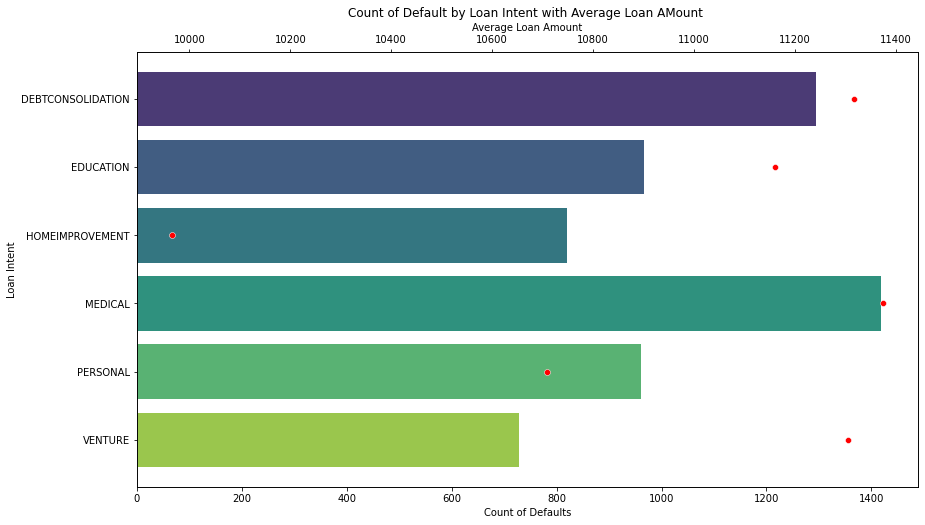

In [16]:
default_cases = data[data['loan_status'] == 1]
loan_intent_default_cases = default_cases.groupby('loan_intent')['loan_status'].count().reset_index()
loan_intent_default_cases.columns = ['Loan Intent','Default Count']
loan_intent_avg_loan_amt = default_cases.groupby('loan_intent')['loan_amnt'].mean().reset_index()
loan_intent_avg_loan_amt.columns = ['Loan Intent','Average Loan Amount']
loan_intent_default_summary = pd.merge(loan_intent_default_cases,loan_intent_avg_loan_amt,
                                       on='Loan Intent')
loan_intent_default_summary.sort_values(by = 'Default Count',ascending=False)
defaultcount = loan_intent_default_summary.sort_values(by = 'Default Count',ascending=False)
print(defaultcount)
averageloanamount = loan_intent_default_summary.sort_values(by = "Average Loan Amount",
                                                            ascending=False)
print(averageloanamount)
fig,ax1= plt.subplots(figsize = (14,8))
sns.barplot(x = 'Default Count',y = 'Loan Intent',data = loan_intent_default_summary,palette='viridis',
           ax = ax1)
ax1.set_title('Count of Default by Loan Intent with Average Loan AMount ')
ax1.set_xlabel('Count of Defaults')
ax1.set_ylabel('Loan Intent')
ax2 = ax1.twiny()
sns.scatterplot(x = 'Average Loan Amount',y = 'Loan Intent',data = loan_intent_default_summary,
               color = 'red',ax = ax2)
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,accuracy_score

In [18]:
x = data.iloc[:,[0,1,3,6,7,2,4,10]]

In [19]:
y = data['loan_status']

In [20]:
x = x.drop(['loan_amnt'],axis = 1)

In [21]:
numeric_features = ['person_age','person_income','person_emp_length','loan_int_rate']
categorical_features = ['person_home_ownership','loan_intent','cb_person_default_on_file']
numeric_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                                     ('scaler',StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                      ('onehot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),
                                              ('cat',categorical_transformer,categorical_features)])

In [22]:
x_processed = preprocessor.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_processed,y,test_size=0.2,random_state=42)
logistic_classifier = LogisticRegression(random_state=42).fit(x_train,y_train)
y_pred = logistic_classifier.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report:",classification_report(y_test,y_pred))
categories = {
    "person_home_ownership":['RENT', 'OWN', 'MORTGAGE', 'OTHER'],
    'loan_intent':['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'],
    'cb_person_default_on_file':['Y', 'N']
}
categorical_columns = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
all_columns = numeric_features+list(categorical_columns)

Accuracy Score: 0.8191545342922294


Classification Report:               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4441
           1       0.68      0.34      0.46      1260

    accuracy                           0.82      5701
   macro avg       0.76      0.65      0.67      5701
weighted avg       0.80      0.82      0.80      5701



In [23]:
def predict_loan_default():
    age = float(input('Applicants age:'))
    income = float(input('Applicants Income:'))
    emp_length = float(input('Applicants employement length:'))
    loan_int_rate = float(input('Loan interest rate:'))
    loan_amnt = float(input('Loan Amount:'))
    loan_percent_Income = loan_amnt/income
    home_ownership = input('Home Ownership (RENT/ OWN/ MORTGAGE/ OTHER)')
    loan_intent = input('Loan intent (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT,DEBTCONSOLIDATION)')
    default_hist = input('Ever defaulted before (Yes/No)')
    input_data = {
        "person_age":[age],'person_income':[income],'person_emp_length':[emp_length],'loan_int_rate':
        [loan_int_rate]
    }
    for category,values in zip(['person_home_ownership','loan_intent','cb_person_default_on_file'],
                                [home_ownership,loan_intent,default_hist]):
        for val in categories[category]:
            input_data[f'{category}_{val}'] = [1 if values == val else 0]
    input_data = pd.DataFrame(input_data)
    for col in all_columns:
        if col not in input_data.columns:
             input_data[col] = 0
    input_data = input_data[all_columns]
    prediction = logistic_classifier.predict(input_data)[0]
    if prediction == 1:
        print('User mostly likely to default')
    else:
        print('User less likely to default')                      
predict_loan_default()

Applicants age:23
Applicants Income:1000
Applicants employement length:3
Loan interest rate:3
Loan Amount:10000
Home Ownership (RENT/ OWN/ MORTGAGE/ OTHER)OTHER
Loan intent (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT,DEBTCONSOLIDATION)VENTURE
Ever defaulted before (Yes/No)NO
User less likely to default


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
numeric_features = ['person_age','person_income','person_emp_length','loan_int_rate']
categorical_features = ['person_home_ownership','loan_intent','cb_person_default_on_file']
numeric_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                                     ('scaler',StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                      ('onehot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),
                                              ('cat',categorical_transformer,categorical_features)])
x_processed = preprocessor.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_processed,y,test_size=0.2,random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42).fit(x_train,y_train)



y_pred = random_forest_classifier.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report:",classification_report(y_test,y_pred))

# Loading and saving the default prediction model

import pickle

with open ('Default_Prediction_Model','wb') as f:
    pickle.dump(random_forest_classifier,f)
    
    
categories = {
    "person_home_ownership":['RENT', 'OWN', 'MORTGAGE', 'OTHER'],
    'loan_intent':['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'],
    'cb_person_default_on_file':['Y', 'N']
}
categorical_columns = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
all_columns = numeric_features+list(categorical_columns)

def predict_loan_default():
    age = float(input('Applicants age:'))
    income = float(input('Applicants Income:'))
    emp_length = float(input('Applicants employement length:'))
    loan_int_rate = float(input('Loan interest rate:'))
    loan_amnt = float(input('Loan Amount:'))
    loan_percent_Income = loan_amnt/income
    home_ownership = input('Home Ownership (RENT/ OWN/ MORTGAGE/ OTHER)')
    loan_intent = input('Loan intent (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT,DEBTCONSOLIDATION)')
    default_hist = input('Ever defaulted before (Yes/No)')
    input_data = {
        "person_age":[age],'person_income':[income],'person_emp_length':[emp_length],'loan_int_rate':
        [loan_int_rate]
    }
    for category,values in zip(['person_home_ownership','loan_intent','cb_person_default_on_file'],
                                [home_ownership,loan_intent,default_hist]):
        for val in categories[category]:
            input_data[f'{category}_{val}'] = [1 if values == val else 0]
    input_data = pd.DataFrame(input_data)
    for col in all_columns:
        if col not in input_data.columns:
             input_data[col] = 0
    input_data = input_data[all_columns]
    prediction = random_forest_classifier.predict(input_data)[0]
    if prediction == 1:
        print('User mostly likely to default')
    else:
        print('User less likely to default')                      
predict_loan_default()

Accuracy Score: 0.858972110156113


Classification Report:               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4441
           1       0.77      0.52      0.62      1260

    accuracy                           0.86      5701
   macro avg       0.82      0.74      0.77      5701
weighted avg       0.85      0.86      0.85      5701

Applicants age:28
Applicants Income:52000
Applicants employement length:8
Loan interest rate:8
Loan Amount:20000
Home Ownership (RENT/ OWN/ MORTGAGE/ OTHER)RENT
Loan intent (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT,DEBTCONSOLIDATION)PERSONAL
Ever defaulted before (Yes/No)Yes
User less likely to default


In [26]:
from sklearn.neighbors import KNeighborsClassifier
numeric_features = ['person_age','person_income','person_emp_length','loan_int_rate']
categorical_features = ['person_home_ownership','loan_intent','cb_person_default_on_file']
numeric_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                                     ('scaler',StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                      ('onehot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features),
                                              ('cat',categorical_transformer,categorical_features)])
x_processed = preprocessor.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_processed,y,test_size=0.2,random_state=42)
knn_classifier = KNeighborsClassifier().fit(x_train,y_train)
y_pred = knn_classifier.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report:",classification_report(y_test,y_pred))
categories = {
    "person_home_ownership":['RENT', 'OWN', 'MORTGAGE', 'OTHER'],
    'loan_intent':['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'],
    'cb_person_default_on_file':['Y', 'N']
}
categorical_columns = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
all_columns = numeric_features+list(categorical_columns)

def predict_loan_default():
    age = float(input('Applicants age:'))
    income = float(input('Applicants Income:'))
    emp_length = float(input('Applicants employement length:'))
    loan_int_rate = float(input('Loan interest rate:'))
    loan_amnt = float(input('Loan Amount:'))
    loan_percent_Income = loan_amnt/income
    home_ownership = input('Home Ownership (RENT/ OWN/ MORTGAGE/ OTHER)')
    loan_intent = input('Loan intent (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT,DEBTCONSOLIDATION)')
    default_hist = input('Ever defaulted before (Yes/No)')
    input_data = {
        "person_age":[age],'person_income':[income],'person_emp_length':[emp_length],'loan_int_rate':
        [loan_int_rate]
    }
    for category,values in zip(['person_home_ownership','loan_intent','cb_person_default_on_file'],
                                [home_ownership,loan_intent,default_hist]):
        for val in categories[category]:
            input_data[f'{category}_{val}'] = [1 if values == val else 0]
    input_data = pd.DataFrame(input_data)
    for col in all_columns:
        if col not in input_data.columns:
             input_data[col] = 0
    input_data = input_data[all_columns]
    prediction = knn_classifier.predict(input_data)[0]
    if prediction == 1:
        print('User mostly likely to default')
    else:
        print('User less likely to default')                      
predict_loan_default()

Accuracy Score: 0.8152955621820733


Classification Report:               precision    recall  f1-score   support

           0       0.84      0.93      0.89      4441
           1       0.63      0.39      0.49      1260

    accuracy                           0.82      5701
   macro avg       0.74      0.66      0.69      5701
weighted avg       0.80      0.82      0.80      5701

Applicants age:45
Applicants Income:100000
Applicants employement length:15
Loan interest rate:3
Loan Amount:1000000
Home Ownership (RENT/ OWN/ MORTGAGE/ OTHER)OTHER
Loan intent (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT,DEBTCONSOLIDATION)MEDICAL
Ever defaulted before (Yes/No)No
User less likely to default


In [27]:
credit_score_data = pd.read_csv('credit_score.csv')

correlation Between Debt and Credit Score:                    DEBT  CREDIT_SCORE
DEBT          1.000000     -0.327231
CREDIT_SCORE -0.327231      1.000000


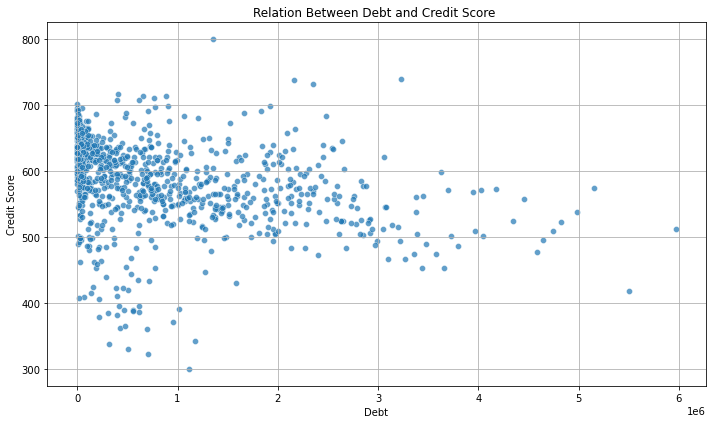

In [28]:
dataframe = credit_score_data[['DEBT','CREDIT_SCORE']]
correlation = dataframe.corr()
print("correlation Between Debt and Credit Score: ",correlation )
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'DEBT',y = 'CREDIT_SCORE',data = dataframe,alpha = 0.7)
plt.title('Relation Between Debt and Credit Score ')
plt.xlabel('Debt')
plt.ylabel('Credit Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
credit_score_data.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


In [30]:
x = credit_score_data[['INCOME','SAVINGS','DEBT','CAT_CREDIT_CARD','DEFAULT']]
y = credit_score_data['CREDIT_SCORE']
x

,INCOME,SAVINGS,DEBT,CAT_CREDIT_CARD,DEFAULT
0,33269,0,532304,0,1
1,77158,91187,315648,0,0
2,30917,21642,534864,0,1
3,80657,64526,629125,0,0
4,149971,1172498,2399531,1,0
...,...,...,...,...,...
995,328892,1465066,5501471,1,0
996,81404,88805,680837,0,1
997,0,42428,30760,0,0
998,36011,8002,604181,1,0


In [31]:
# Hypertuning parameter using randomsearch

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
dt = DecisionTreeRegressor(random_state=42).fit(x_train,y_train)


param_dist = {
    "max_depth":randint(3,20),
    "min_samples_split":randint(2,20),
    "min_samples_leaf":randint(1,10),
    "max_features":['sqrt','log2',None],
    'criterion': ['squared_error', 'absolute_error']
}

random_search = RandomizedSearchCV(estimator=dt,param_distributions=param_dist,
                                  n_iter=50,
                                  cv = 5,
                                  scoring='neg_mean_squared_error',
                                  n_jobs=-1,
                                  verbose=1,random_state=42).fit(x_train,y_train)
random_search_pred = random_search.predict(x_test)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [32]:
def predict_credit_score(income,savings,debt,cat_credit_card,default):
    input_data = pd.DataFrame({
        "INCOME":[income],
        "SAVINGS":[savings],
        "DEBT":[debt],
        "CAT_CREDIT_CARD":[cat_credit_card],
        "DEAFULT":[default]
    })
    credit_score_prediction = random_search.predict(input_data)
    return credit_score_prediction[0]
income = float(input("Enter Customer Income: "))
savings = float(input("Enter Customer saving: "))
debt = float(input("Enter Customer Debt: "))
cat_credit_card = int(input('Enter 1 if custpmer has credit card or 0 for no: '))
default = int(input('Enter 1 for default or 0 for no: '))
predicted_credit_score = predict_credit_score(income,savings,debt,cat_credit_card,default)
print("Credit Score:",predicted_credit_score)

Enter Customer Income: 20000
Enter Customer saving: 200000
Enter Customer Debt: 30000
Enter 1 if custpmer has credit card or 0 for no: 0
Enter 1 for default or 0 for no: 1
Credit Score: 635.2352941176471


In [33]:
# Loading and saving the Credit Scoring model

import pickle
with open ('Credit_Score_prediction_Model','wb') as f:
    pickle.dump(random_search,f)